In [1]:
import numpy as np

from matplotlib import pyplot as plt
from citk.layer import Dense
from citk.model import FFN
from citk.functions import ReLU, Linear
from citk.losses import MSE
from citk.optimisers import ConjugateSGDOptimizer

from utils import get_and_process_boston_dataset, visualise_boston

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

# Data

In [2]:
X_train, X_test, y_train, y_test = get_and_process_boston_dataset()

#visualise_boston(X_train, X_test, y_train, y_test)

# Create Model

In [3]:
model = FFN(
    input_shape=X_train.shape[1], 
    layer_specs=[
        Dense(16, nonlinearity=ReLU),
        Dense(32, nonlinearity=ReLU),
        Dense(1, nonlinearity=Linear)
    ], 
    loss=MSE, 
    reg_coef=0.05
)

## Train Model

In [4]:
trained, history = model.fit(
    train_sample=(X_train, y_train),
    validation_sample=(X_test, y_test),
    optimiser=ConjugateSGDOptimizer(batch_size=32),
    batch_size=32,
    iters=20_000,
    verbose=False
)

# Predict and Visualise losses

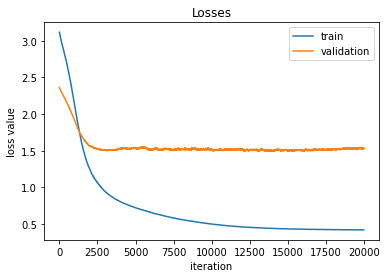

In [5]:
plt.title('Losses')
plt.plot(history['train_loss'], label='train')
plt.plot(history['validation_loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [6]:
prediction = trained.predict(X_test)
prediction_train = trained.predict(X_train)

print(f"Test MSE: {MSE(y_test, prediction)[0]}")
print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

Test MSE: 1.1694890473838475
Train MSE: 0.9185307930330018


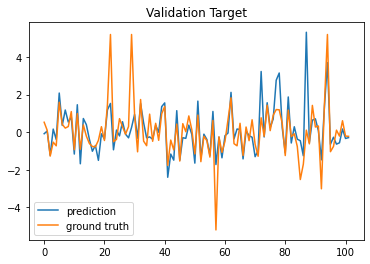

In [7]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.show()

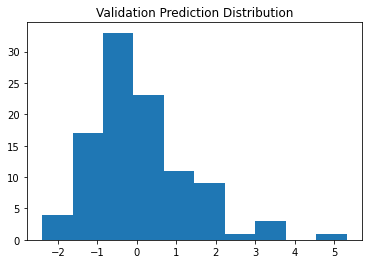

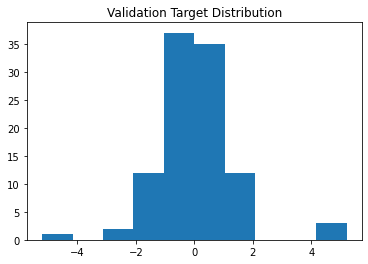

In [8]:
plt.title('Validation Prediction Distribution')
plt.hist(prediction)
plt.show()

plt.title('Validation Target Distribution')
plt.hist(y_test)
plt.show()